In [66]:
import pandas as pd

#file = "D:/MSc_RESEARCH/prototype/code/analysis/metrics/metrics_data_results_20250911_210902.csv" #10
#file = "D:/MSc_RESEARCH/prototype/code/analysis/metrics/metrics_data_results_20250911_205835.csv" #4
file = "D:/MSc_RESEARCH/prototype/code/analysis/metrics/metrics_data_results_20250911_204009.csv" #1
x=1


In [67]:
df = pd.read_csv(file)
df.dtypes

type                     object
actor_name               object
message_type_or_count    object
value                     int64
dtype: object

In [68]:
# Split into two DataFrames
df_latency = df[df['type'] == 'LATENCY'].reset_index(drop=True)
df_load = df[df['type'] == 'LOAD'].reset_index(drop=True)

In [69]:
df_latency.drop(columns=['type'], inplace=True)

In [70]:
df_load.drop(columns=['message_type_or_count', 'type'], inplace=True)

In [71]:
df_load

,actor_name,value
0,dataShard-0,1
1,ParameterShardActor,1
2,dataShard-0,1
3,encoder-dataShard-0,1
4,latent-dataShard-0,1
...,...,...
2802498,latent-dataShard-0,1
2802499,encoder-dataShard-0,1
2802500,dataShard-0,1
2802501,ParameterShardActor,1


In [ ]:
import pandas as pd

def column_classes(df):
    return pd.DataFrame({
        "column": df.columns,
        "classes": [df[col].unique().tolist() for col in df.columns]
    })

In [73]:
df_latency_avg_values = df_latency.groupby("actor_name")["value"].mean().reset_index()
df_latency_avg_values= df_latency_avg_values[df_latency_avg_values["actor_name"] != "ParameterShardActor"]
df_latency_avg_values

,actor_name,value
1,dataShard-0,187.301416
2,decoder-dataShard-0,464.374963
3,encoder-dataShard-0,417.085201
4,latent-dataShard-0,248.130483


In [74]:
# extract both parts (returns 2 columns)
latency_parts = df_latency_avg_values["actor_name"].str.extract(r"^(decoder|encoder|latent)?-?(dataShard)")

# join them into one string per row
df_latency_avg_values["actor"] = latency_parts.fillna("").agg("".join, axis=1)

# now compute average per group
latency_df_avg = df_latency_avg_values.groupby("actor", as_index=False)["value"].mean()

In [75]:
latency_df_avg

,actor,value
0,dataShard,187.301416
1,decoderdataShard,464.374963
2,encoderdataShard,417.085201
3,latentdataShard,248.130483


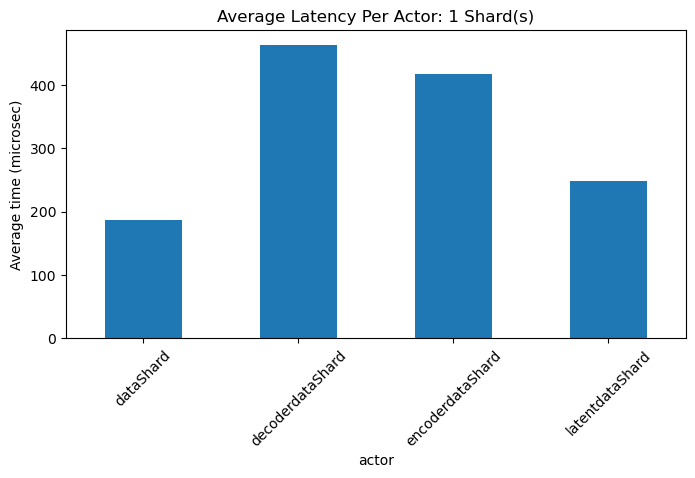

In [ ]:
import matplotlib.pyplot as plt

latency_df_avg.plot(x="actor", y="value", kind="bar", legend=False, figsize=(8,4))
plt.ylabel("Average time (microsec)")
plt.title(f"Average Latency Per Actor: {x} Shard(s)")
plt.xticks(rotation=45)
plt.show()

In [77]:
# groupby and compute mean
df_load_sum = (df_load.groupby("actor_name", as_index=False)["value"].sum())

In [78]:
df_load_sum

,actor_name,value
0,ParameterShardActor,280251
1,dataShard-0,840752
2,decoder-dataShard-0,560500
3,encoder-dataShard-0,560500
4,latent-dataShard-0,560500


In [79]:
df_load_sum= df_load_sum[df_load_sum["actor_name"] != "ParameterShardActor"]
df_load_sum

,actor_name,value
1,dataShard-0,840752
2,decoder-dataShard-0,560500
3,encoder-dataShard-0,560500
4,latent-dataShard-0,560500


In [ ]:
# extract both parts (returns 2 columns)
df_load_parts = df_load_sum["actor_name"].str.extract(r"^(decoder|encoder|latent)?-?(dataShard)")

# join them into one string per row
df_load_sum["group"] = df_load_parts.fillna("").agg("".join, axis=1)

# now compute average per group
df_load_avg_values = df_load_sum.groupby("group", as_index=False)["value"].mean()

C:\Users\ME\AppData\Local\Temp\ipykernel_16840\3145070192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load_sum["group"] = df_load_parts.fillna("").agg("".join, axis=1)


In [81]:
df_load_avg_values

,group,value
0,dataShard,840752.0
1,decoderdataShard,560500.0
2,encoderdataShard,560500.0
3,latentdataShard,560500.0


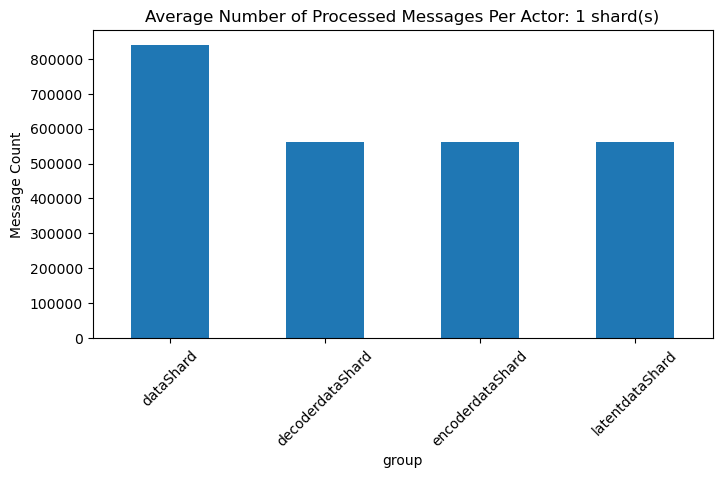

In [ ]:
df_load_avg_values.plot(x="group", y="value", kind="bar", legend=False, figsize=(8,4))
plt.ylabel("Message Count")
plt.title(f"Average Number of Processed Messages Per Actor: {x} shard(s)")
plt.xticks(rotation=45)
plt.show()